In [3]:
!pip install numpy
!pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 64.8 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 kB 25.6 MB/s eta 0:00:00
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 76.2 MB/s eta 0:00:000m eta 0:00:01
  Using cached kiwisolver-1.4.4-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)


## Exercise: Grover's Algorithms
Brief description of Grover's algorithm (maybe on the slides?)

Package required:

In [4]:
!pip install qibo
!pip install qibojit
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 7.0 MB/s eta 0:00:00
  Using cached cma-3.2.2-py2.py3-none-any.whl (249 kB)
  Using cached sympy-1.11.1-py3-none-any.whl (6.5 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached PyYAML-6.0-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (661 kB)
  Using cached scipy-1.9.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (33.8 MB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached mpmath-1.2.1-py3-none-any.whl (532 kB)
  Using cached qibojit-0.0.6-py3-none-any.whl (29 kB)
  Using cached numba-0.56.4-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.5 MB)
  Using cached llvmlite-0.39.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.6 MB)
  Using cached tensorflow-2.11.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_p

  Using cached wrapt-1.14.1-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (77 kB)
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached tensorflow_io_gcs_filesystem-0.28.0-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached tensorboard-2.11.0-py3-none-any.whl (6.0 MB)
  Using cached libclang-14.0.6-py2.py3-none-manylinux2010_x86_64.whl (14.1 MB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached Markdown-3.4.1-py3-none-any.whl (93 kB)
  Using cached Werkzeug-2.2.2-py3-none-any.whl (232 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached google_auth-2.14.1-py2.py3-none-any.whl (175 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-manylinux

Check the version

In [5]:
import qibo
import qibojit
print(qibo.__version__)
print(qibojit.__version__)

0.1.9
0.0.6


Import qibo modules

In [6]:
from qibo import models, gates, set_backend
set_backend("numpy")

[Qibo 0.1.9|INFO|2022-11-22 15:31:16]: Using numpy backend on /CPU:0


### Exercise: Grover's algorithm using Qibo

We already saw in the slides that the Grover's algorithm is divided into 3 different parts
* Create superposition
* Create oracle
* Create diffusion operator

Assuming that we are looking to find the bistring 111...1 write the corresponding quantum circuit that implements
Grover's algorithm.

#### Step 1: creating the superposition
We need to write a circuit that will implement the superposition of all possible states.

In [7]:
def create_superposition(nqubits):
    """Create circuit for superposition"""
    superposition = models.Circuit(nqubits+1)
    for i in range(nqubits):
        superposition.add(gates.H(i))
    superposition.add(gates.X(nqubits))
    superposition.add(gates.H(nqubits))

    return superposition

You can check the gates in the circuit by drawing it

In [8]:
superposition = create_superposition(3)
print(superposition.draw())

q0: ─H───
q1: ─H───
q2: ─H───
q3: ─X─H─


To check whether the circuit works as expected you can visualize the amplitudes using the function `plot_amplitude`.

In [9]:
def plot_amplitudes(amplitudes, p=False):
    """Plot amplitudes of the quantum circuit"""
    amplitudes = amplitudes.state()
    states = []
    amp = []
    for i in range(int(len(amplitudes)/2)):
        states.append("{0:0{bits}b}".format(i, bits=int(np.log2(len(amplitudes)/2))))
    for i in range(0, len(amplitudes), 2):
        amp.append((1/np.sqrt(2))*(np.real(amplitudes[i])-np.real(amplitudes[i+1])))
    if p:
        print(amp)
    fig = plt.figure(figsize = (18,6))
    width = 0.5
    plt.title('Amplitudes', fontdict={'fontsize': 14})
    plt.xlabel('state', fontsize=14)
    plt.ylabel('magnitude', fontsize=14)
    plt.ylim(-1.1,1.1)
    plt.bar(states, amp, color='C0', width=width)
    plt.grid()
    plt.show()

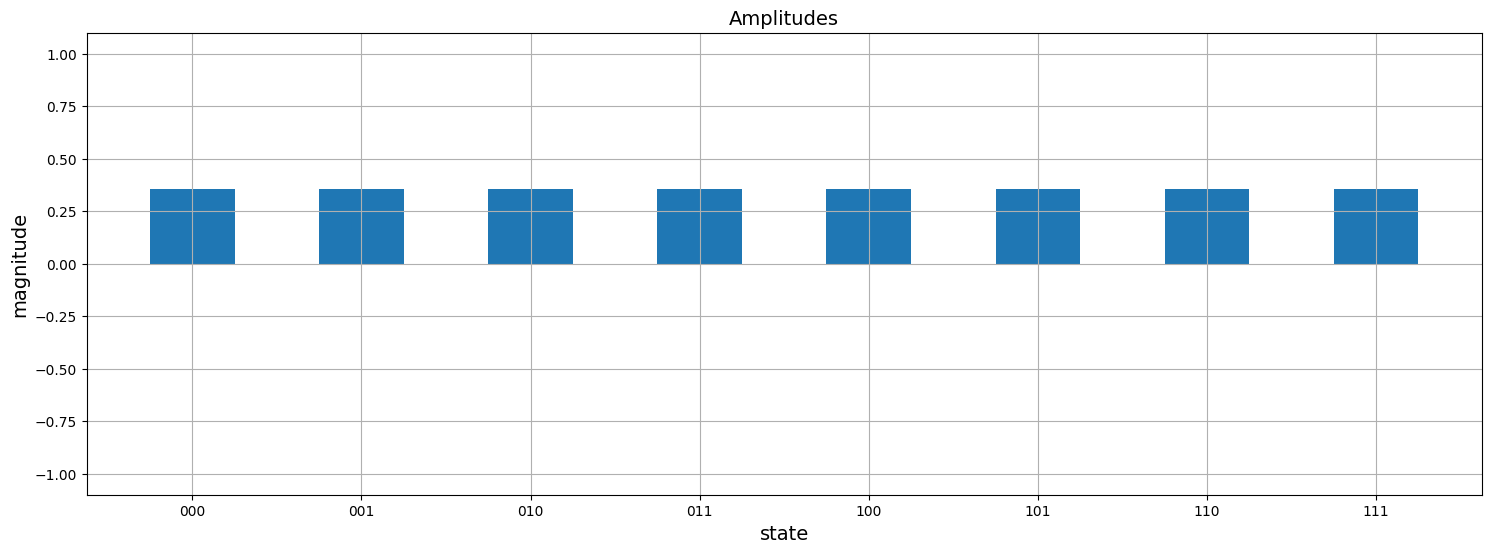

In [10]:
result = superposition()
plot_amplitudes(result)

### Coding the oracle
The oralcle is the operator that changes the sign of the amplitudes of the quantum states that encode solutions of the problem, in our case the state 11.....1


In [11]:
def create_oracle(nqubits):
    """Oracle"""
    oracle = models.Circuit(nqubits+1)
    oracle.add(gates.X(nqubits).controlled_by(*range(nqubits)))
    return oracle

Note the use of `gate.controlled_by` method which allows to control any gate to an arbitrary number of qubits

In [12]:
oracle = create_oracle(3)
print(oracle.draw())

q0: ─o─
q1: ─o─
q2: ─o─
q3: ─X─


Lets check again the final amplitudes after creating the superposition and applying the oracle. 

First we create the total circuit

In [13]:
circuit = superposition + oracle
print(circuit.draw())

q0: ─H───o─
q1: ─H───o─
q2: ─H───o─
q3: ─X─H─X─


and then we plot the final amplitudes using the functon `plot_amplitude`

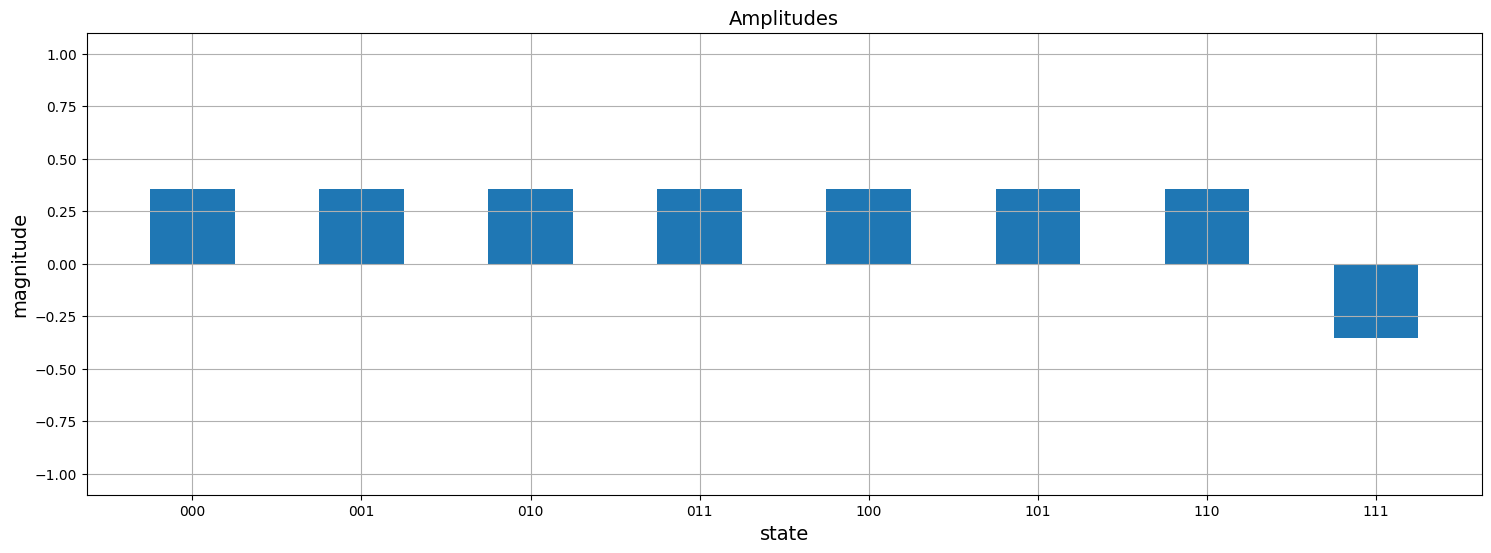

In [14]:
result = circuit()
plot_amplitudes(result)

Notice how the oracle inverted the sign of the amplitude of the target state.

### Coding the diffuser
To perform the diffusion operator we need to invert anything perpendicular to |s⟩. This can be done using a method similar to the Oracle.


In [15]:
def create_diffuser(nqubits):
    diffuser = models.Circuit(nqubits+1)
    for i in range(nqubits):
        diffuser.add(gates.H(i))
    for i in range(nqubits):
        diffuser.add(gates.X(i))
    diffuser.add(gates.Z(0).controlled_by(*range(1,nqubits)))
    for i in range(nqubits):
        diffuser.add(gates.X(i))
    for i in range(nqubits):
        diffuser.add(gates.H(i))
    return diffuser

Let's check the amplitudes after the diffusion using the same methods as above

In [16]:
diffuser = create_diffuser(3)
circuit = superposition + oracle + diffuser
print(circuit.draw())

q0: ─H───o─H─X─Z─X─H─
q1: ─H───o─H─X─o─X─H─
q2: ─H───o─H─X─o─X─H─
q3: ─X─H─X───────────


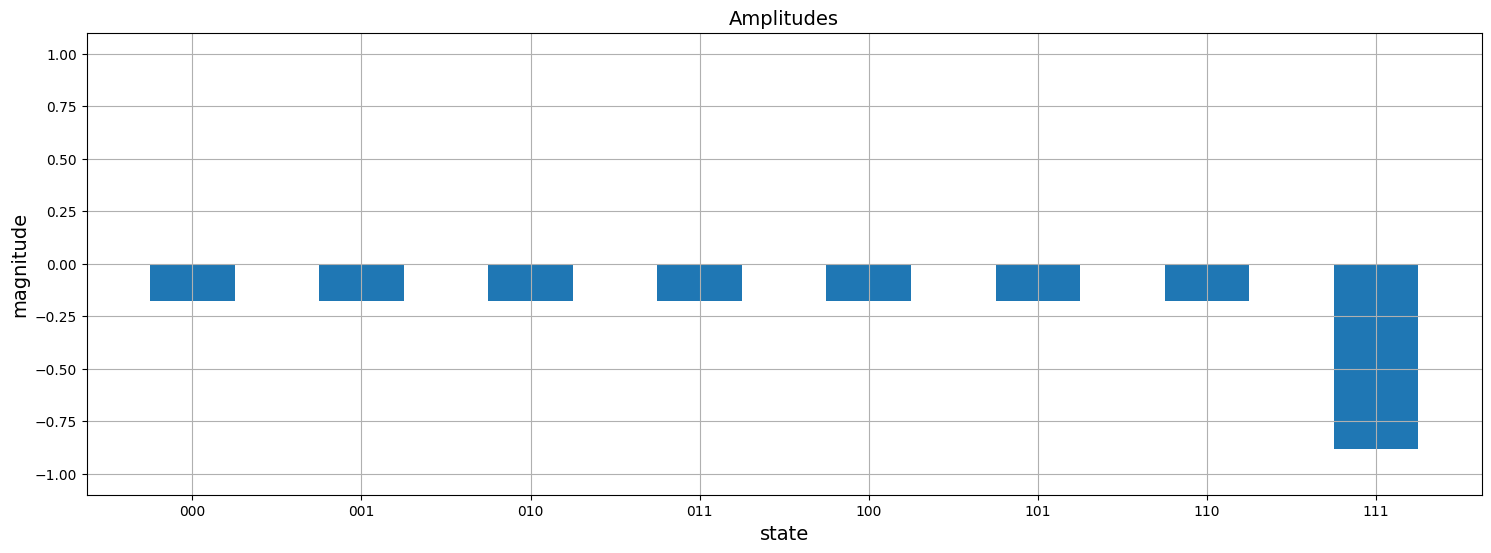

In [17]:
result = circuit()
plot_amplitudes(result)

Notice how the diffuser increased the amplitude of the target state.

### Grover's algorithm

Repeating the oracle + diffuser operation for many iterations, further amplifies the probability to measure the target state.

In [18]:
def create_grover(nqubits, iterations):
    """Complete circuit that implements Grover's algorithm.
    
    Args:
        nqubits (int): Number of qubits in the circuit / target state.
        iterations (int): Number of times the oracle + diffuser operation is repeated.
    """
    superposition = create_superposition(nqubits)
    oracle = create_oracle(nqubits)
    diffuser = create_diffuser(nqubits)
    
    grover = models.Circuit(nqubits+1)
    grover += superposition
    for _ in range(iterations):
        grover += oracle + diffuser
    # measure all qubits
    grover.add([ gates.M(i) for i in range(nqubits)])
    return grover

You can check how the amplitude is affected by changing the number of iterations below

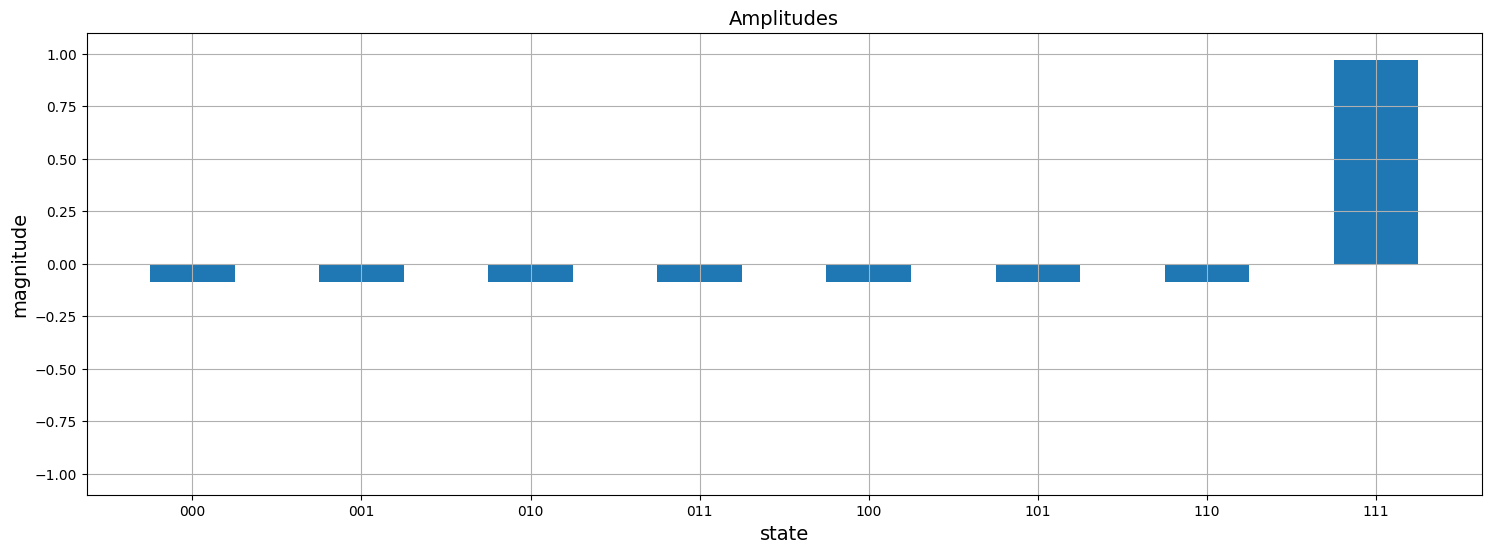

In [19]:
grover = create_grover(3, 2)
plot_amplitudes(grover())

The number of iterations that gives the highest probability is given by

$$ \frac{\pi }{4}\sqrt{\frac{2^{n_{qubits}}}{n_{solutions}}} $$

where $n_{solutions}$ is the number of target solutions to the search. In our case $n_{solutions} = 1$.

In [20]:
def grover_iterations(nqubits, nsol=1):
    return int((np.pi/4)*np.sqrt((2**nqubits)/nsol))

In [21]:
iterations = grover_iterations(3)
iterations

2

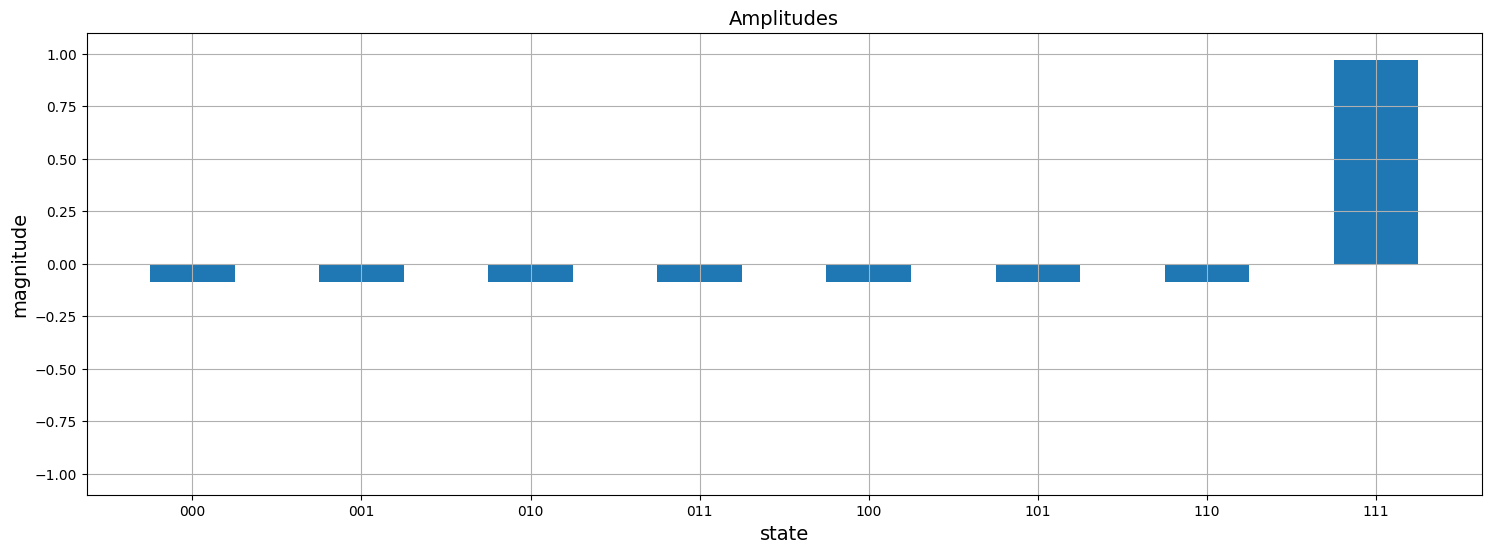

In [22]:
grover = create_grover(3, iterations)
plot_amplitudes(grover())

We can also have a look at the frequencies of measuring each bitstring

In [23]:
result = grover(nshots=1000)
result.frequencies()

Counter({'000': 11,
         '001': 9,
         '010': 4,
         '011': 6,
         '100': 12,
         '101': 4,
         '110': 5,
         '111': 949})

## Let's try to run the Grover's algorithm with an increasing number of qubits?

Lets run the following benchmark to understand why hardware acceleration is important.

In [24]:
import time

def performance(backend, qubit_range, platform=None):
    if platform is None:
        set_backend(backend)
    else:
        set_backend(backend, platform=platform)
    
    for i in qubit_range:
        iterations = grover_iterations(i,1)
        print("nqubits", i, end="")
        circuit = create_grover(i, iterations)
        start = time.time()
        result = circuit(nshots=1000)
        end = time.time()
        print(f"\tTime = {end-start}")
        # Frequency of the target bitstring
        freq = result.frequencies().get(i * '1')
        print("Frequency =", freq)
        print()

In [26]:
performance("numpy", range(4,20))

[Qibo 0.1.9|INFO|2022-11-22 15:33:25]: Using numpy backend on /CPU:0


nqubits 4	Time = 0.00144195556640625
Frequency = 965

nqubits 5	Time = 0.0013766288757324219
Frequency = 1000

nqubits 6	Time = 0.0019028186798095703
Frequency = 997

nqubits 7	Time = 0.004794120788574219
Frequency = 996

nqubits 8	Time = 0.007553577423095703
Frequency = 1000

nqubits 9	Time = 0.01234889030456543
Frequency = 1000

nqubits 10	Time = 0.028682708740234375
Frequency = 999

nqubits 11	Time = 0.07252097129821777
Frequency = 1000

nqubits 12	Time = 0.19954872131347656
Frequency = 1000

nqubits 13	Time = 0.5567760467529297
Frequency = 1000

nqubits 14	Time = 1.6157896518707275
Frequency = 1000

nqubits 15	Time = 4.693300008773804
Frequency = 1000

nqubits 16

KeyboardInterrupt: 

In [ ]:
performance("tensorflow", range(4,20))

[Qibo 0.1.9|INFO|2022-11-22 15:33:51]: Using tensorflow backend on /device:CPU:0


nqubits 4	Time = 0.0212552547454834
Frequency = tf.Tensor(953, shape=(), dtype=int64)

nqubits 5	Time = 0.026745319366455078
Frequency = tf.Tensor(1000, shape=(), dtype=int64)

nqubits 6	Time = 0.04332566261291504
Frequency = tf.Tensor(994, shape=(), dtype=int64)

nqubits 7	Time = 0.06605124473571777
Frequency = tf.Tensor(995, shape=(), dtype=int64)

nqubits 8	Time = 0.11837935447692871
Frequency = tf.Tensor(1000, shape=(), dtype=int64)

nqubits 9	Time = 0.23500823974609375
Frequency = tf.Tensor(1000, shape=(), dtype=int64)

nqubits 10	Time = 0.4235525131225586
Frequency = tf.Tensor(999, shape=(), dtype=int64)

nqubits 11	Time = 0.7016787528991699
Frequency = tf.Tensor(1000, shape=(), dtype=int64)

nqubits 12	Time = 1.3141107559204102
Frequency = tf.Tensor(1000, shape=(), dtype=int64)

nqubits 13	Time = 3.0493922233581543
Frequency = tf.Tensor(1000, shape=(), dtype=int64)

nqubits 14

In [ ]:
performance("qibojit", range(4,20))